In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("data/dataframe.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.datetime = pd.to_datetime(df.datetime, format="%Y-%m-%d %X")

In [18]:
# the means in different periods differ a lot from one another -> time series non-stationary
df1 = df[:120]
print(df1.bhfs_north.mean())
df2 = df[120:240]
print(df2.bhfs_north.mean())
df3 = df[240:360]
print(df3.bhfs_north.mean())
df4 = df[360:480]
print(df4.bhfs_north.mean())
df5 = df[480:600]
print(df5.bhfs_north.mean())

1378.3333333333333
1250.275
868.7583333333333
569.2083333333334
650.0165847251521


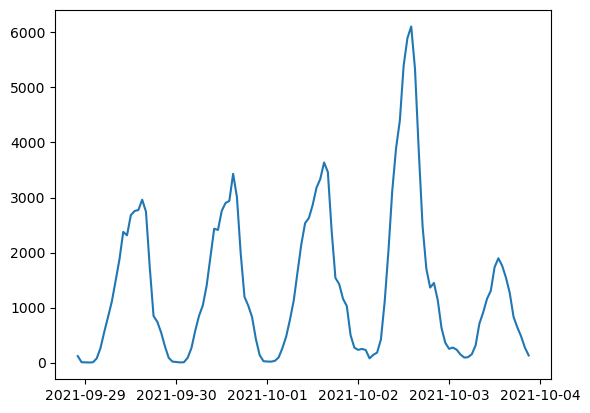

In [22]:
# graph shows clear seasonality -> time series non-stationary
df1 = df[:120]
fig, ax = plt.subplots()
ax.plot(df1.datetime, df1.bhfs_north)

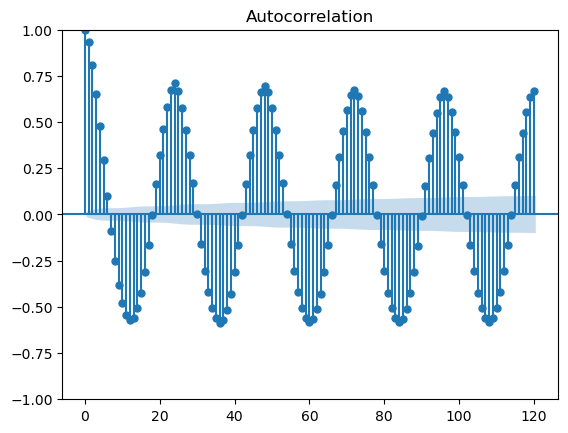

In [23]:
# all lags are outside of the confidence interval -> time series non-stationary
sm.graphics.tsa.plot_acf(df.bhfs_north, lags=120)
plt.show()

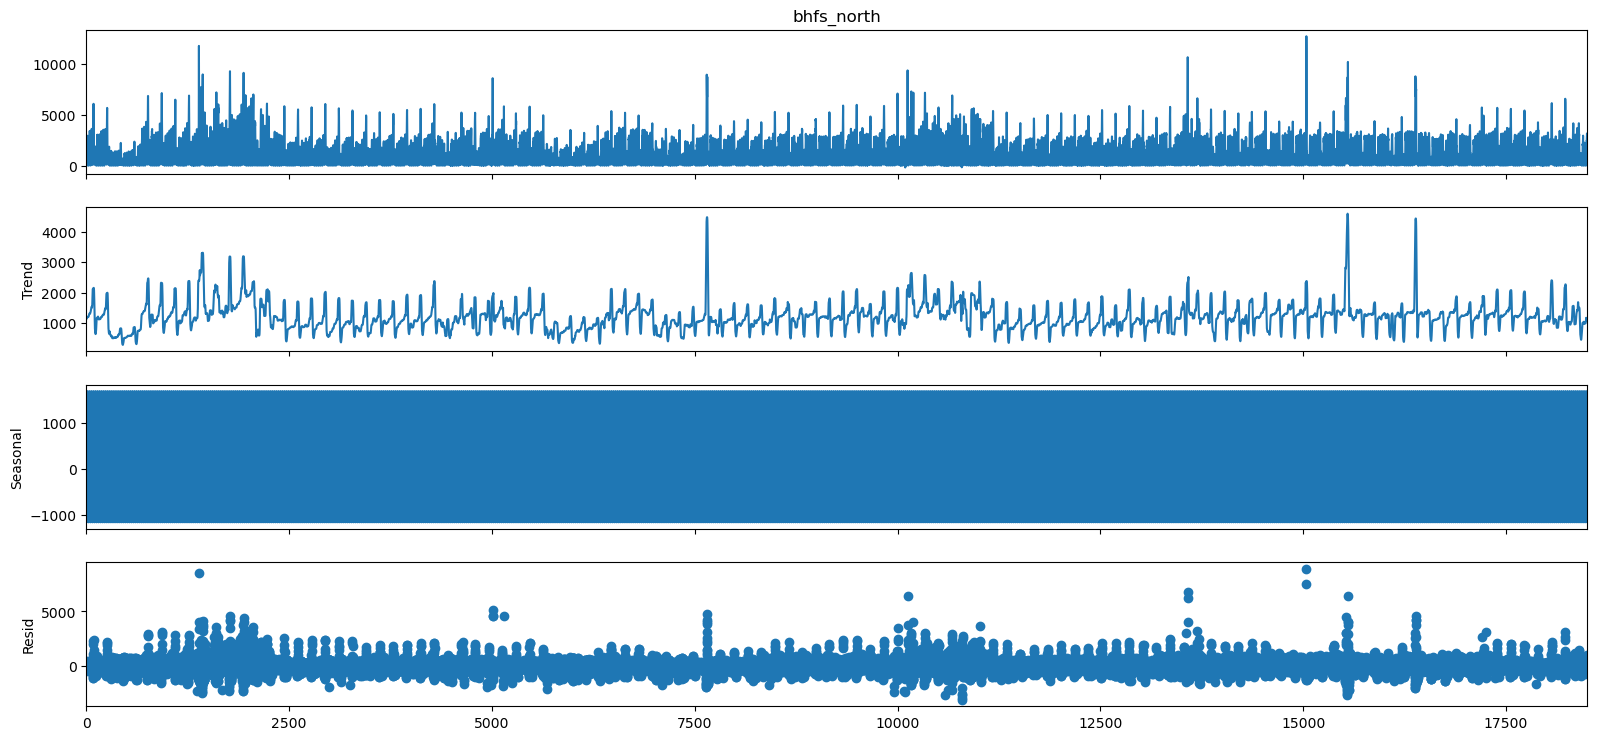

In [25]:
# seasonal_decompose results in non-sensical plot
from statsmodels.tsa.seasonal import seasonal_decompose

stl_df = seasonal_decompose(
    df["bhfs_north"], model="additive", period=24, extrapolate_trend="freq"
)

fig = stl_df.plot()
fig.set_size_inches((18, 8))
plt.show()

In [26]:
# even though the above illustrations prove that the time series is non-stationary,
# the kpss-test shows a p-value that is below the stationarity-threshold of 0.5
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

columns_to_test = ["bhfs_south", "bhfs_middle", "bhfs_north"]
for column in columns_to_test:
    kpss_test(df[column])

KPSS Statistic: 1.6503105064818313
p-value: 0.01
num lags: 41
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 1.5495647744101537
p-value: 0.01
num lags: 49
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.4151883458599859
p-value: 0.07060847161207506
num lags: 43
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/tmp/ipykernel_162/2955954578.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)
/tmp/ipykernel_162/2955954578.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [27]:
# even though the above illustrations prove that the time series is non-stationary,
# the adf-test shows a p-value that is below the stationarity-threshold of 0.5
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
columns_to_test = ["bhfs_south", "bhfs_middle", "bhfs_north"]
for column in columns_to_test:
    result = adfuller(df[column], autolag='AIC')
    print(f"ADF Statistic for {column}: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Number of Lags: {result[2]}")
    print(f"Critical Values: {result[4]}")
    print("\n")

ADF Statistic for bhfs_south: -15.30746297117825
P-value: 4.230811747626996e-28
Number of Lags: 44
Critical Values: {'1%': -3.4307043676716362, '5%': -2.861696617334636, '10%': -2.5668533632531334}


ADF Statistic for bhfs_middle: -14.173002122358378
P-value: 1.988186813359011e-26
Number of Lags: 45
Critical Values: {'1%': -3.430704386876024, '5%': -2.8616966258217547, '10%': -2.5668533677706895}


ADF Statistic for bhfs_north: -13.286394849360128
P-value: 7.513290917780427e-25
Number of Lags: 45
Critical Values: {'1%': -3.430704386876024, '5%': -2.8616966258217547, '10%': -2.5668533677706895}




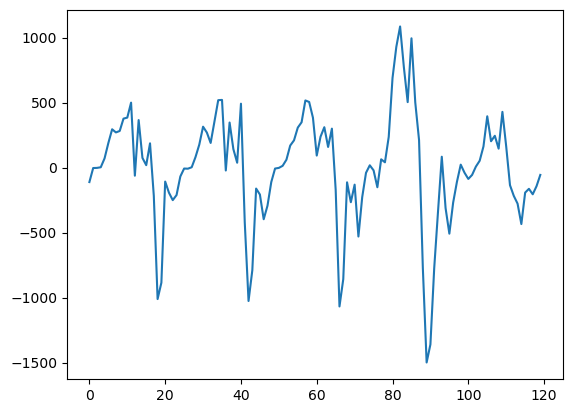

In [32]:
bhfs_north_diff = np.diff(df["bhfs_north"])
plt.plot(bhfs_north_diff[:120]);